In [14]:
! pip install -q kaggle

In [15]:
from google.colab import files


In [18]:
! mkdir ~/.kagglee

In [23]:
! cp kaggle.json ~/.kaggle/

In [24]:
! chmod 600 ~/.kaggle/kaggle.json

In [28]:

!kaggle competitions download -c dog-vs-cat-classification

100% 717M/718M [00:44<00:00, 18.3MB/s]
100% 718M/718M [00:44<00:00, 17.0MB/s]


In [31]:
! mkdir train_dogs_and_cats

In [32]:
! unzip dog-vs-cat-classification.zip -d train_dogs_and_cats

Streaming output truncated to the last 5000 lines.
  inflating: train_dogs_and_cats/train/train/dogs/dog.5499.jpg  
  inflating: train_dogs_and_cats/train/train/dogs/dog.55.jpg  
  inflating: train_dogs_and_cats/train/train/dogs/dog.550.jpg  
  inflating: train_dogs_and_cats/train/train/dogs/dog.5500.jpg  
  inflating: train_dogs_and_cats/train/train/dogs/dog.5501.jpg  
  inflating: train_dogs_and_cats/train/train/dogs/dog.5502.jpg  
  inflating: train_dogs_and_cats/train/train/dogs/dog.5503.jpg  
  inflating: train_dogs_and_cats/train/train/dogs/dog.5504.jpg  
  inflating: train_dogs_and_cats/train/train/dogs/dog.5505.jpg  
  inflating: train_dogs_and_cats/train/train/dogs/dog.5506.jpg  
  inflating: train_dogs_and_cats/train/train/dogs/dog.5507.jpg  
  inflating: train_dogs_and_cats/train/train/dogs/dog.5508.jpg  
  inflating: train_dogs_and_cats/train/train/dogs/dog.5509.jpg  
  inflating: train_dogs_and_cats/train/train/dogs/dog.551.jpg  
  inflating: train_dogs_and_cats/train/trai

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [34]:
# Define directories
train_dir = '/content/train_dogs_and_cats/train/train'
validation_dir = '/content/train_dogs_and_cats/test/test'

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Source directory for the training images
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=20,
    class_mode='binary'  # Since we use binary_crossentropy loss, we need binary labels
)

# Flow validation images in batches of 20 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 25000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [35]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [36]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # 2000 images = batch_size * steps
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50  # 1000 images = batch_size * steps
)


Epoch 1/30
100/100 [==============================] - 19s 117ms/step - loss: 0.7027 - accuracy: 0.4980
Epoch 2/30
100/100 [==============================] - 12s 119ms/step - loss: 0.6930 - accuracy: 0.5300
Epoch 3/30
100/100 [==============================] - 12s 118ms/step - loss: 0.6910 - accuracy: 0.5295
Epoch 4/30
100/100 [==============================] - 12s 118ms/step - loss: 0.6946 - accuracy: 0.5110
Epoch 5/30
100/100 [==============================] - 12s 118ms/step - loss: 0.6879 - accuracy: 0.5375
Epoch 6/30
100/100 [==============================] - 12s 119ms/step - loss: 0.6887 - accuracy: 0.5520
Epoch 7/30
100/100 [==============================] - 12s 120ms/step - loss: 0.6891 - accuracy: 0.5330
Epoch 8/30
100/100 [==============================] - 12s 118ms/step - loss: 0.6874 - accuracy: 0.5505
Epoch 9/30
100/100 [==============================] - 12s 119ms/step - loss: 0.6750 - accuracy: 0.5790
Epoch 10/30
100/100 [==============================] - 12s 118ms/step - l

dict_keys(['loss', 'accuracy'])


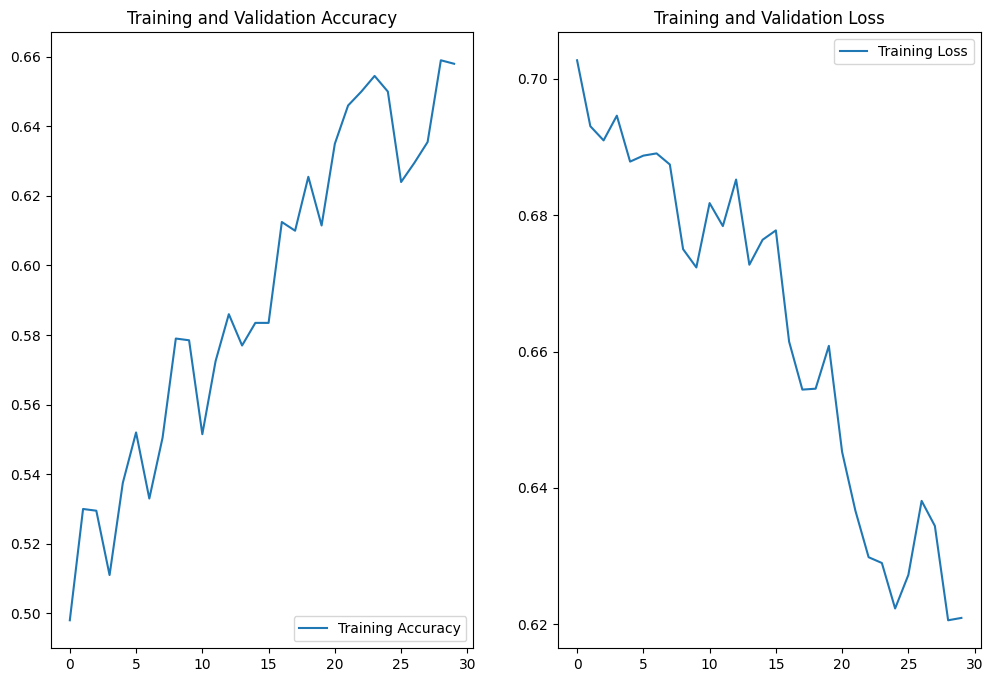

In [40]:
# Access training history
history_dict = history.history

# Check keys to ensure 'val_accuracy' and 'val_loss' are present
print(history_dict.keys())

# Plot training and validation accuracy and loss
acc = history_dict['accuracy']
val_acc = history_dict.get('val_accuracy')
loss = history_dict['loss']
val_loss = history_dict.get('val_loss')

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
if val_acc:
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
if val_loss:
    plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [42]:
# Save the model
model.save('cat_dog_classifier.h5')



In [43]:
import pickle

# Save the model as a pickle file
with open('cat_dog_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)


In [44]:
import json

# Convert model to JSON string
model_json = model.to_json()

# Save JSON string to file
with open('cat_dog_classifier.json', 'w') as json_file:
    json_file.write(model_json)


In [49]:
from tensorflow.keras.preprocessing import image

# Load the model and make predictions
loaded_model = load_model('cat_dog_classifier.h5')

# Function to make a prediction on a single image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Remember to normalize
    prediction = loaded_model.predict(img_array)
    return 'Dog' if prediction[0][0] > 0.5 else 'Cat'

# Test the function
img_path = '/content/train_dogs_and_cats/test/test/000000.jpg'
print(predict_image(img_path))


1/1 [==============================] - 0s 309ms/step
Dog
